In [4]:
import numpy as np
import glob

files = glob.glob('/Users/esteves/Downloads/clockordertest*')
files

['/Users/esteves/Downloads/clockordertest_20250307T121949_500nm_m0.txt',
 '/Users/esteves/Downloads/clockordertest_20250307T121949_500nm_m1.txt',
 '/Users/esteves/Downloads/clockordertest_20250307T121949_500nm_m2.txt',
 '/Users/esteves/Downloads/clockordertest_20250307T121949_500nm_m-1.txt',
 '/Users/esteves/Downloads/clockordertest_20250307T121949_500nm_m-2.txt']

In [37]:
names = ["m0","m1","m2","m-1","m-2"]
colors = ["k","firebrick","red","tab:blue","blue"]
lss = ["-","--","dotted","--","--"]

data = dict().fromkeys(names)
for i,n in enumerate(names):
    data[n] = np.genfromtxt(files[i])

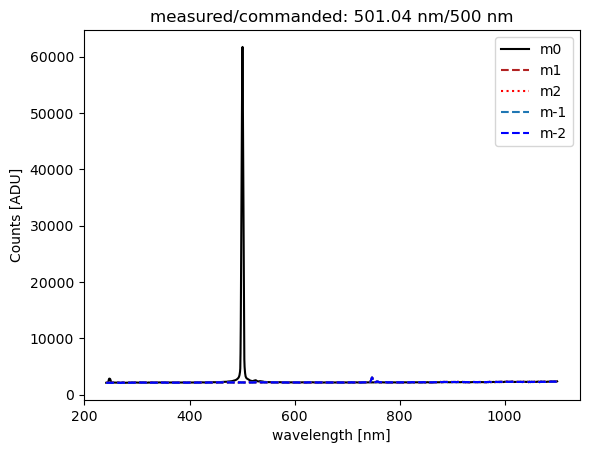

In [92]:
import matplotlib.pyplot as plt

def plot_spec(d,axis=None, is_norm=True):
    if axis is None: axis = plt.gca()
    shift = 0
    for i,n in enumerate(names):
        if is_norm:
            if i>1: shift= (i-1)*0.2
            axis.plot(d[n][50:,0],shift+(d[n][50:,1]-np.median(d[n][:,1]))/np.max(d[n][:,1]),ls=lss[i],label=n,color=colors[i])
        else:
            axis.plot(d[n][50:,0],d[n][50:,1],ls=lss[i],label=n,color=colors[i])
    axis.set_xlabel('wavelength [nm]')
    if is_norm:
        peak_offset= d[names[0]][:,1]-d[names[1]][:,1]
        axis.set_ylabel('Relative Strength normalized by the peak')
    else:
        argpeak = np.nanargmax(data[names[0]][:,1])
        wavpeak = data[names[0]][argpeak,0]
        axis.set_ylabel('Counts [ADU]')
        axis.set_title(f"measured/commanded: {wavpeak} nm/500 nm")
    axis.legend()
plot_spec(data, is_norm=False)
plt.legend()

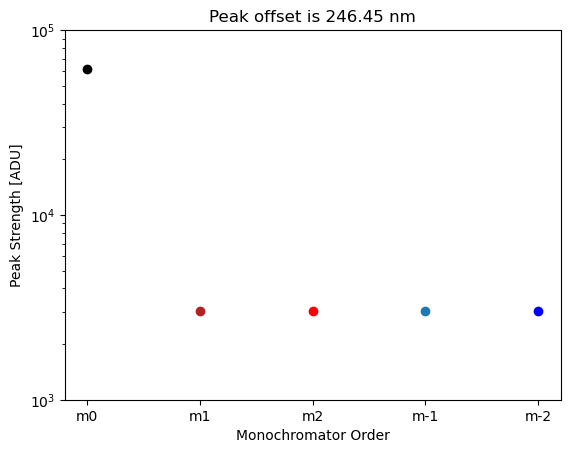

In [97]:
def plot_line_peak(data,axis=None,**kwargs):
    if axis is None: axis = plt.gca()
    wavpeaks = []
    for i,n in enumerate(names):
        peak = np.nanmax(data[n][:,1])
        argpeak = np.nanargmax(data[n][:,1])
        wavpeak = data[n][argpeak,0]
        wavpeaks.append(wavpeak)
        axis.plot(n, peak, color=colors[i], marker="o")
    axis.set_yscale('log')
    axis.set_ylim(1e3, 1e5)
    axis.set_xlabel('Monochromator Order')
    axis.set_ylabel('Peak Strength [ADU]')
    axis.set_title('Peak offset is {:.2f} nm'.format(wavpeaks[1]-wavpeaks[0]))
plot_line_peak(data)

In [100]:
def plot_spec(d,axis=None, is_norm=True):
    if axis is None: axis = plt.gca()
    shift = 0
    for i,n in enumerate(names):
        if is_norm:
            if i>1: shift= (i-1)*0.2
            axis.plot(d[n][50:,0],shift+(d[n][50:,1]-np.median(d[n][:,1]))/np.max(d[n][:,1]),ls=lss[i],label=n,color=colors[i])
        else:
            axis.plot(d[n][50:,0],d[n][50:,1],ls=lss[i],label=n,color=colors[i])
    axis.set_xlabel('wavelength [nm]')
    
    wavpeaks = []
    for i,n in enumerate(names):
        peak = np.nanmax(data[n][:,1])
        argpeak = np.nanargmax(data[n][:,1])
        wavpeak = data[n][argpeak,0]
        wavpeaks.append(wavpeak)

    if is_norm:
        peak_offset= d[names[0]][:,1]-d[names[1]][:,1]
        axis.set_ylabel('Relative Strength normalized by the peak')
        axis.set_title('Peak offset is {:.2f} nm'.format(wavpeaks[1]-wavpeaks[0]))

    else:
        argpeak = np.nanargmax(data[names[0]][:,1])
        wavpeak = data[names[0]][argpeak,0]
        axis.set_ylabel('Counts [ADU]')
        axis.set_title(f"measured/commanded: {wavpeak} nm/500 nm")
    axis.legend()
def plot_line_peak(data,axis=None,**kwargs):
    if axis is None: axis = plt.gca()
    wavpeaks = []
    for i,n in enumerate(names):
        peak = np.nanmax(data[n][:,1])
        argpeak = np.nanargmax(data[n][:,1])
        wavpeak = data[n][argpeak,0]
        wavpeaks.append(wavpeak)
        axis.plot(n, peak, color=colors[i], marker="o")
    axis.set_yscale('log')
    axis.set_ylim(1e3, 1e5)
    axis.set_xlabel('Monochromator Order')
    axis.set_ylabel('Peak Strength [ADU]')
    

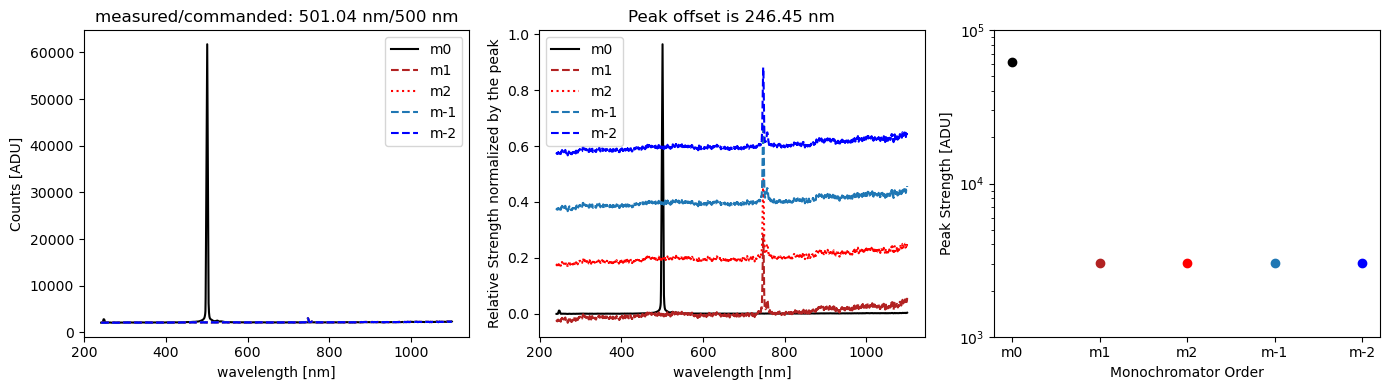

In [101]:
fig, axis = plt.subplots(1,3,figsize=(14,4))
plot_spec(data, axis=axis[0], is_norm=False)
plot_spec(data, axis=axis[1])
plot_line_peak(data, axis=axis[2])
fig.tight_layout()
fig.savefig("monochromator_order_test.png", dpi=120)